In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [20]:
data = {
    'Car ID':     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Brand':      ['Toyota', 'Ford', 'Honda', 'Chevrolet', 'Nissan', 'Toyota', 'Ford', 'Honda', 'Nissan', 'Chevrolet'],
    'Mileage':    [25000, 35000, 15000, 45000, 30000, 20000, 40000, 28000, 32000, 38000],
    'Horsepower': [150, 200, 120, 180, 160, 140, 210, 130, 170, 190],
    'Fuel Type':  ['Gasoline', 'Diesel', 'Gasoline', 'Diesel', 'Gasoline', 'Hybrid', 'Diesel', 'Gasoline', 'Hybrid', 'Gasoline'],
    'Price ($)':  [20000, 25000, 18000, 22000, 23000, 26000, 24000, 21000, 27000, 23000]
}

car_specs = pd.DataFrame(data)
print(car_specs)

   Car ID      Brand  Mileage  Horsepower Fuel Type  Price ($)
0       1     Toyota    25000         150  Gasoline      20000
1       2       Ford    35000         200    Diesel      25000
2       3      Honda    15000         120  Gasoline      18000
3       4  Chevrolet    45000         180    Diesel      22000
4       5     Nissan    30000         160  Gasoline      23000
5       6     Toyota    20000         140    Hybrid      26000
6       7       Ford    40000         210    Diesel      24000
7       8      Honda    28000         130  Gasoline      21000
8       9     Nissan    32000         170    Hybrid      27000
9      10  Chevrolet    38000         190  Gasoline      23000


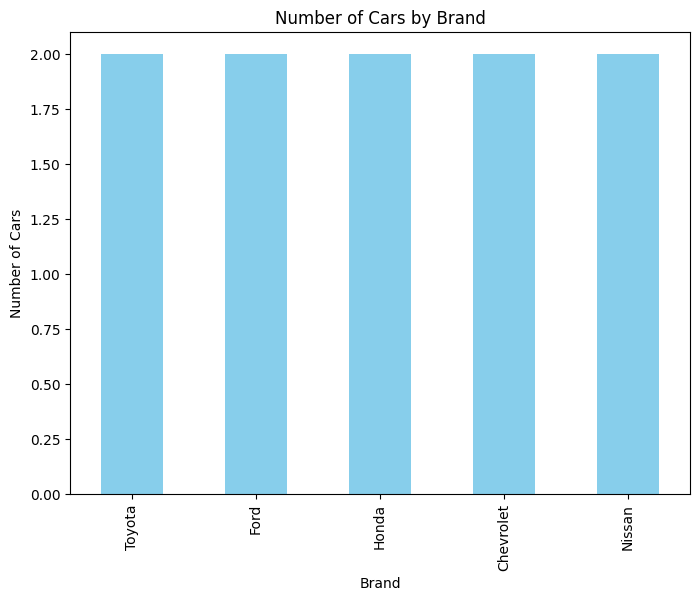

In [21]:
# Plotting an histogram
plt.figure(figsize=(8, 6))
car_specs['Brand'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.show()

In [22]:
# Extract 'Mileage' and 'Horsepower' columns for scaling
features_to_scale = ['Mileage', 'Horsepower']
features_scaled = car_specs[features_to_scale]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_scaled)

# Create a new DataFrame with the scaled features
scaled_df = pd.DataFrame(features_standardized, columns=features_to_scale)

scaled_df = scaled_df + abs(scaled_df.min())

#  sum of all the scaled values
sum_of_mileage = scaled_df['Mileage'].sum()

sum_of_horsepower = scaled_df['Horsepower'].sum()

# Display
print(scaled_df)

print("\n Sum of sclaed Mileage\n", sum_of_mileage)
print("\n Sum of sclaed Horsepower\n", sum_of_horsepower)


    Mileage  Horsepower
0  1.142876    1.044466
1  2.285752    2.785242
2  0.000000    0.000000
3  3.428627    2.088932
4  1.714314    1.392621
5  0.571438    0.696311
6  2.857190    3.133398
7  1.485739    0.348155
8  1.942889    1.740777
9  2.628614    2.437087

 Sum of sclaed Mileage
 18.057437674858527

 Sum of sclaed Horsepower
 15.666989036012806


In [23]:
# Define bins and labels
bins = [min(car_specs['Horsepower']), 150, 180, max(car_specs['Horsepower'])]
labels = ['Low', 'Medium', 'High']

# Bin the 'Horsepower' feature
car_specs['Horsepower_Category'] = pd.cut(car_specs['Horsepower'], bins=bins, labels=labels, include_lowest=True)

# Display
print(car_specs[['Horsepower', 'Horsepower_Category']])

   Horsepower Horsepower_Category
0         150                 Low
1         200                High
2         120                 Low
3         180              Medium
4         160              Medium
5         140                 Low
6         210                High
7         130                 Low
8         170              Medium
9         190                High


In [24]:
# Use LabelEncoder to encode the 'Brand' feature
label_encoder = LabelEncoder()
car_specs['Brand_Label'] = label_encoder.fit_transform(car_specs['Brand'])

# Display 
print(car_specs[['Brand', 'Brand_Label']])

       Brand  Brand_Label
0     Toyota            4
1       Ford            1
2      Honda            2
3  Chevrolet            0
4     Nissan            3
5     Toyota            4
6       Ford            1
7      Honda            2
8     Nissan            3
9  Chevrolet            0


In [25]:
# Perform one-hot encoding on the 'Fuel Type' feature
fuel_type_encoded = pd.get_dummies(car_specs['Fuel Type'], prefix='Fuel_Type')

# Concatenate the one-hot encoded columns with the original DataFrame
car_specs = pd.concat([car_specs, fuel_type_encoded], axis=1)

# Display
print(car_specs)

   Car ID      Brand  Mileage  Horsepower Fuel Type  Price ($)  \
0       1     Toyota    25000         150  Gasoline      20000   
1       2       Ford    35000         200    Diesel      25000   
2       3      Honda    15000         120  Gasoline      18000   
3       4  Chevrolet    45000         180    Diesel      22000   
4       5     Nissan    30000         160  Gasoline      23000   
5       6     Toyota    20000         140    Hybrid      26000   
6       7       Ford    40000         210    Diesel      24000   
7       8      Honda    28000         130  Gasoline      21000   
8       9     Nissan    32000         170    Hybrid      27000   
9      10  Chevrolet    38000         190  Gasoline      23000   

  Horsepower_Category  Brand_Label  Fuel_Type_Diesel  Fuel_Type_Gasoline  \
0                 Low            4             False                True   
1                High            1              True               False   
2                 Low            2           